## Make sure there is data in the ./output folder before running this

In [5]:
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import json

import itertools
import seaborn as sns
import os

from wordcloud import WordCloud 

code for loading .json files in output folder

In [6]:
datas = {}
region = {'IN': 'India', 
          'US': 'USA', 
          'GB': 'Great Britain', 
          'DE': 'Germany', 
          'CA': 'Canada', 
          'FR': 'France', 
          'RU': 'Russia', 
          'BR': 'Brazil', 
          'MX': 'Mexico', 
          'KR': 'South Korea', 
          'JP': 'Japan'}

for f in listdir('./output'):
    if f.endswith('_analysis.json'):
        datas[f[:2]] = temp = json.load(open(f'./output/{f}', encoding='utf-8'))

In [7]:
def make_horizontal(data, title):
    # code reference:
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
    plt.rcdefaults()
    fig, ax = plt.subplots()
    labels = tuple(data.keys())
    y_pos = np.arange(len(labels))
    
    ax.barh(y_pos, data.values(), align='center')
    ax.set_yticks(y_pos, labels=labels)
    ax.invert_yaxis()
    ax.set_xlabel('Trend Video Count')
    ax.set_title(title)
    
    for i, v in enumerate(data.values()):
        ax.text(10, i + 0.25, str(v), fontweight='bold')
        
    plt.show()

### Generate bar graph for trend video categories of all regions

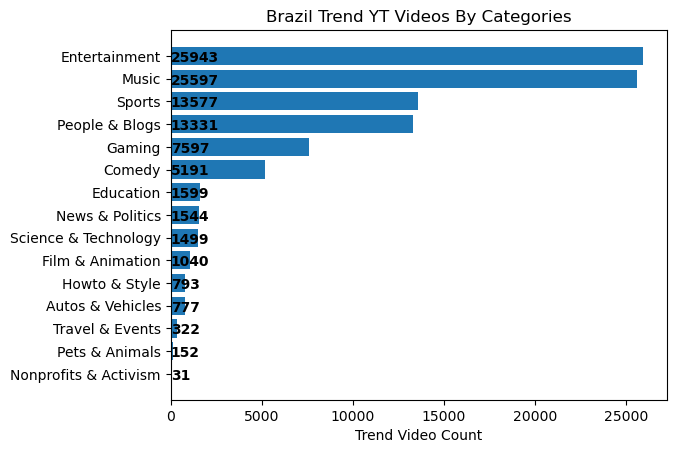

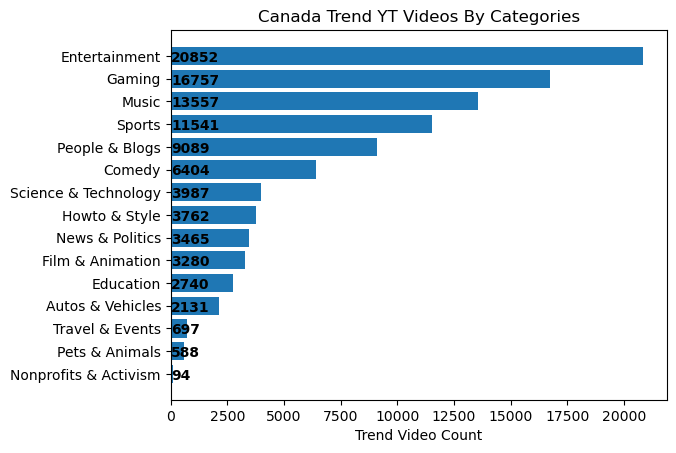

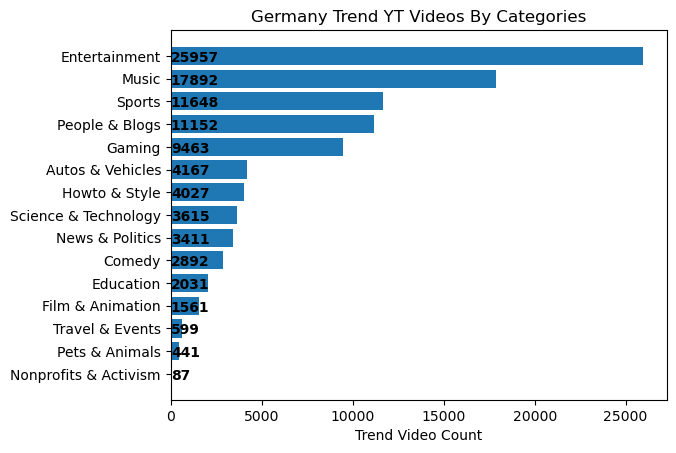

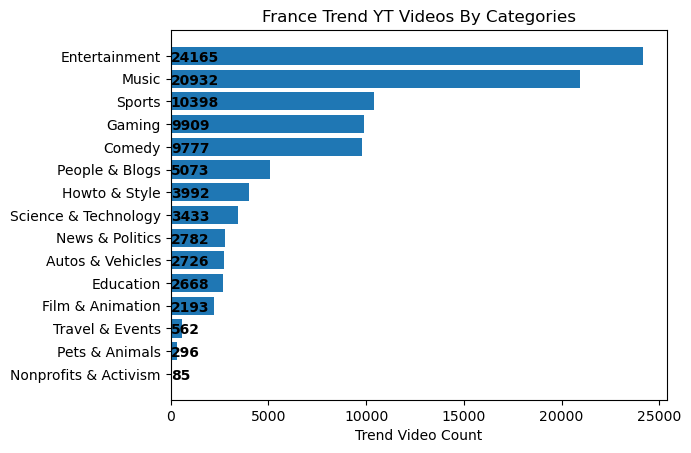

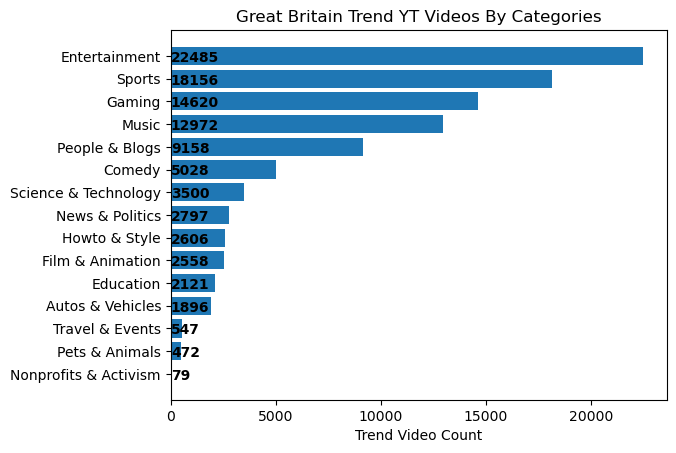

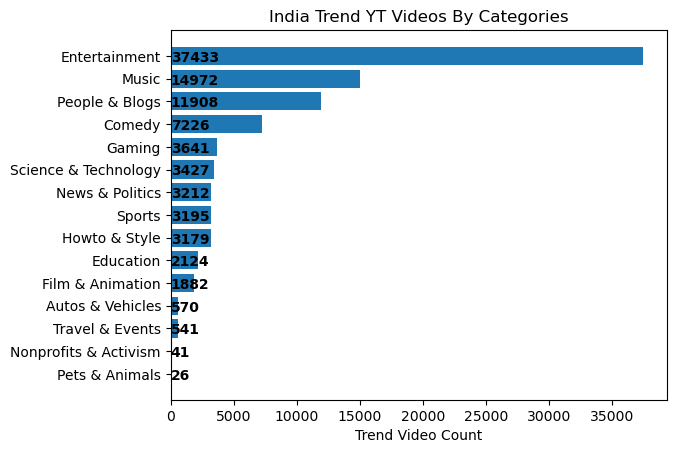

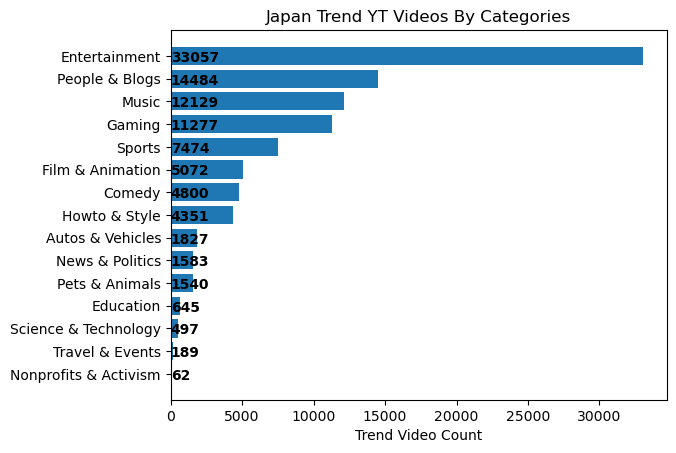

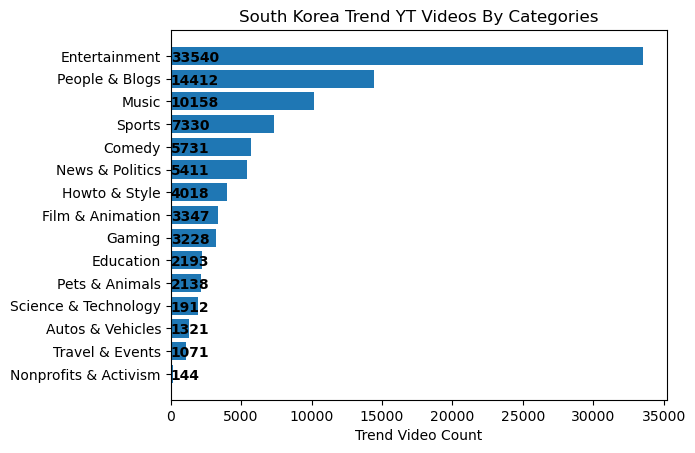

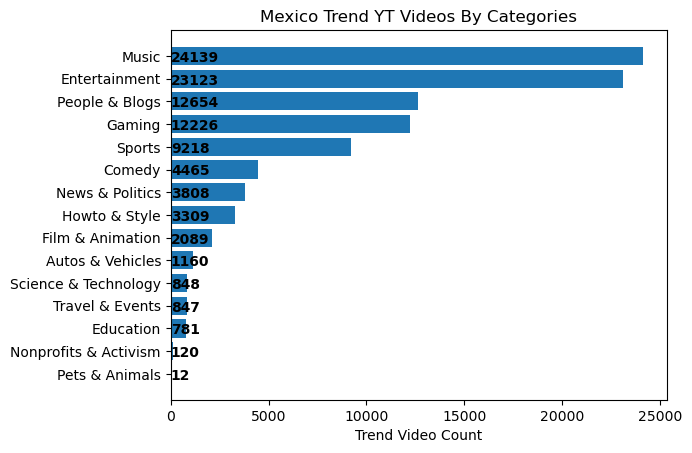

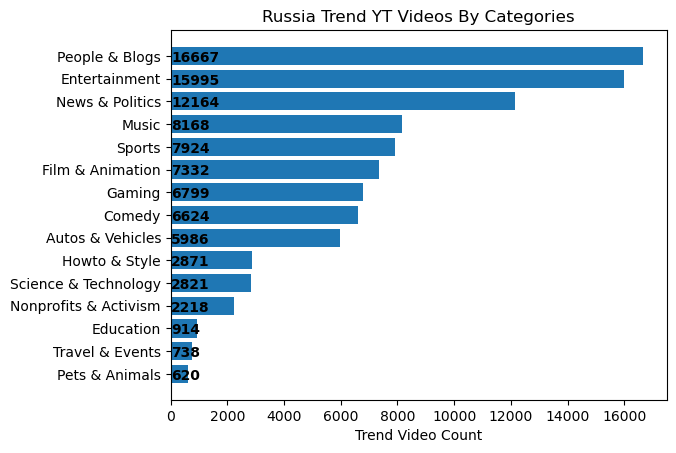

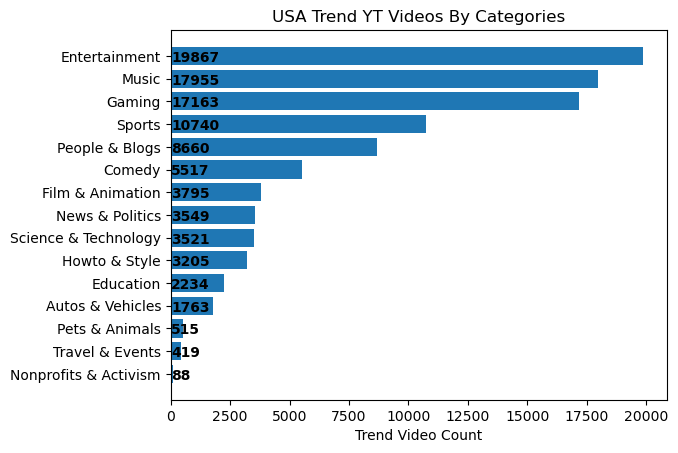

In [8]:
for k, v in datas.items():
    make_horizontal(v['trend_category'], f'{region[k]} Trend YT Videos By Categories')

### Generate bar graph with trend video time difference between upload and trend date

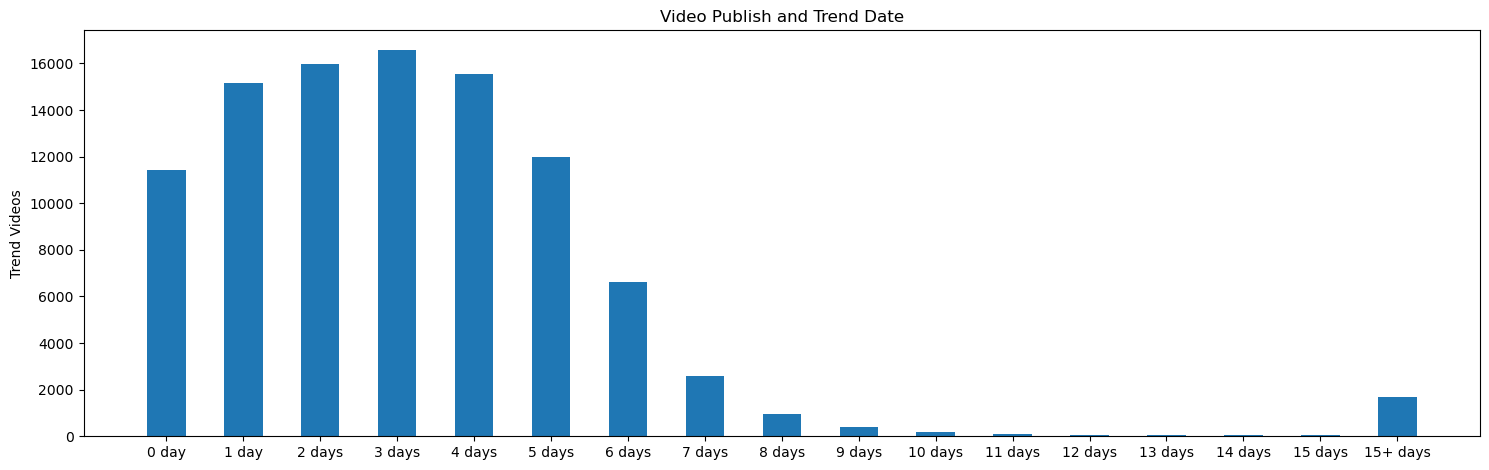

In [9]:
days = 15 # days to display

labels = ['0 day', '1 day']
for i in range(2, days + 1):
    labels.append(f'{i} days')
labels.append(f'{days}+ days')

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots()
fig.set_figwidth(15)

tmp_data = []
for i in range(days + 2):
    tmp_data.append(0)

for i, v in enumerate(datas.values()):
    d = v['days_took_to_trend']
    tmp = list(d.values())
    for i in range(1, days + 2):
        tmp_data[i - 1] = tmp[i]
    t = 0
    for i in range(days + 2, len(tmp)):
        t += tmp[i]
    tmp_data[days + 1] += t
    
rects = ax.bar(x, tmp_data, width)

ax.set_ylabel('Trend Videos')
ax.set_title('Video Publish and Trend Date')
ax.set_xticks(x, labels)

fig.tight_layout()

plt.show()

code for plotting common words

In [10]:
# original code from general-analysis
def plot_word_freq(data, x_amt, title, image_fn=None):
    first_x = dict(itertools.islice(data.items(), int(x_amt)))
    words = list(first_x.keys())
    freq = list(first_x.values())
    
    plt.figure(figsize=(12,8))
    sns.barplot(x=freq, y=words)
    plt.title(title, fontsize=20)
    plt.xlabel('Frequency', fontsize=16)
    plt.ylabel('Phrases', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    for i, v in enumerate(freq):
        plt.text(v, i, int(v), fontsize=12, alpha=0.75, va='center')
    
    if image_fn:
        plt.savefig(f'.images/{image_fn}')
    
    plt.show()

code for generating plot of common words along with data re-organization

In [11]:
def print_titles_plot(k, v):
    r = region[k]
    
    data = {}
    for i in v['trend_title_phrase'].values():
        for k1, v1 in i.items():
            try:
                data[k1] += v1
            except KeyError:
                data[k1] = int(v1)
        
    
    data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))
    
    plot_word_freq(data, 25, f'{r} - Most Common 3-word Phrases', image_fn=None)

### Generate bar graph for most common 3-word phrase in USA trend videos

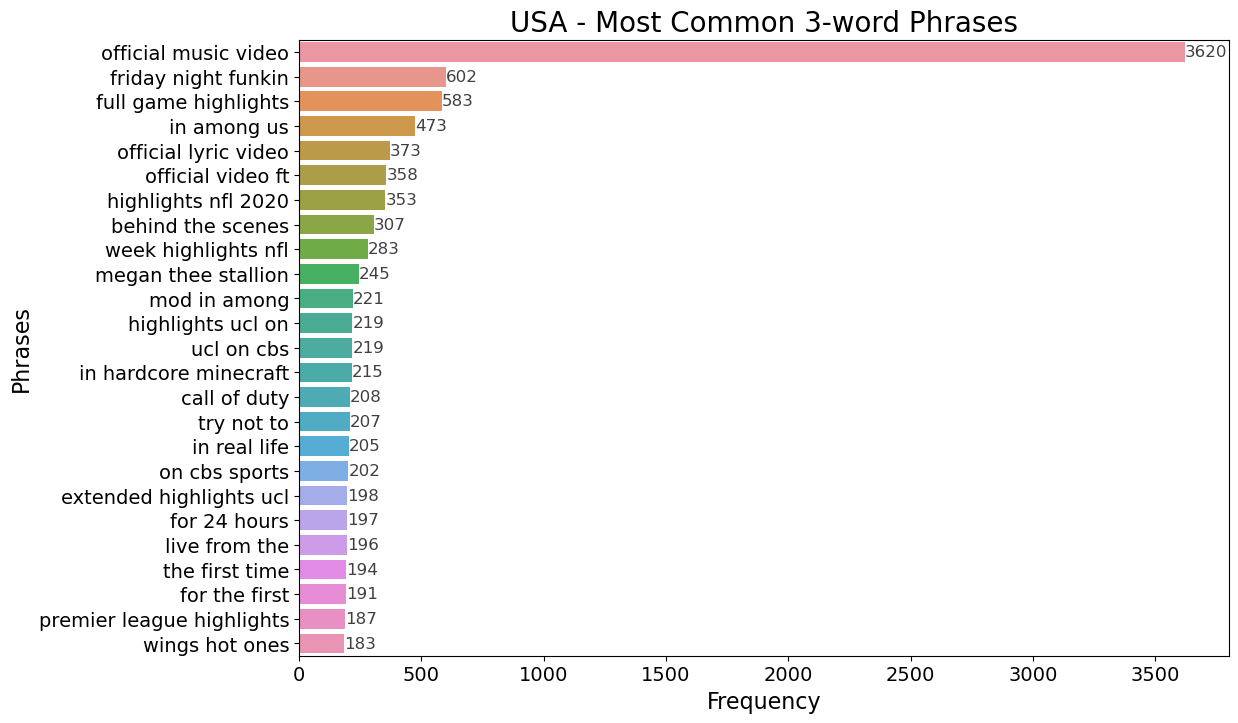

In [12]:
print_titles_plot('US', datas['US'])

### Generate bar graph for most common 3-word phrase in Canada trend videos

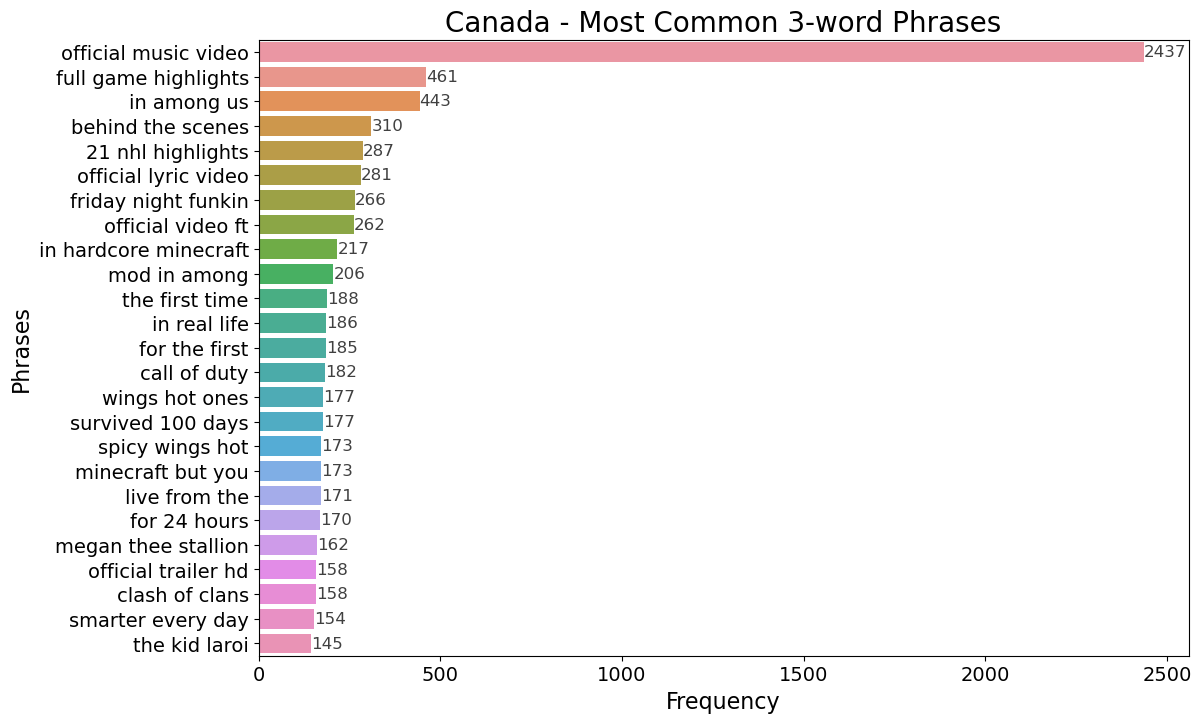

In [13]:
print_titles_plot('CA', datas['CA'])

### Generate bar graph for most common 3-word phrase in Great Britain trend videos

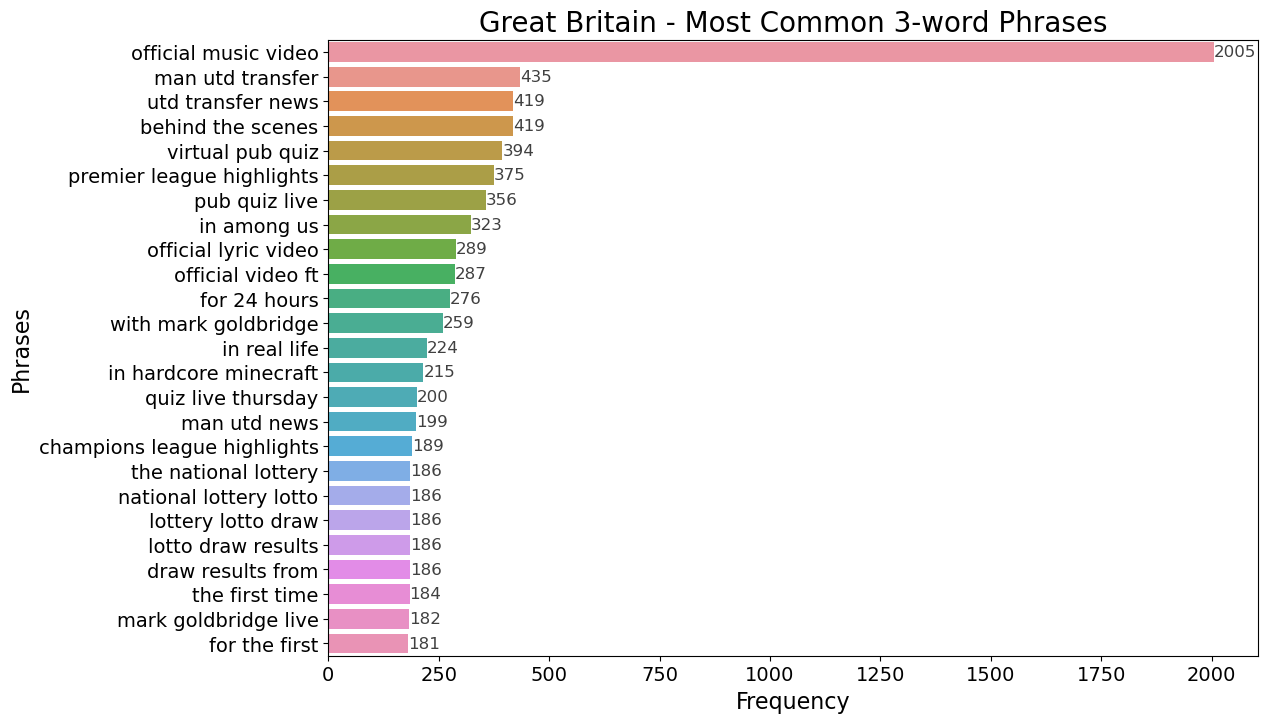

In [14]:
print_titles_plot('GB', datas['GB'])